In [1]:
from scipy import sparse
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
data_sparse = sparse.load_npz("data_prepared_final.npz")

# 2. SVD
svd = TruncatedSVD(n_components=14, random_state=42)
data_reduced = svd.fit_transform(data_sparse)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_reduced)


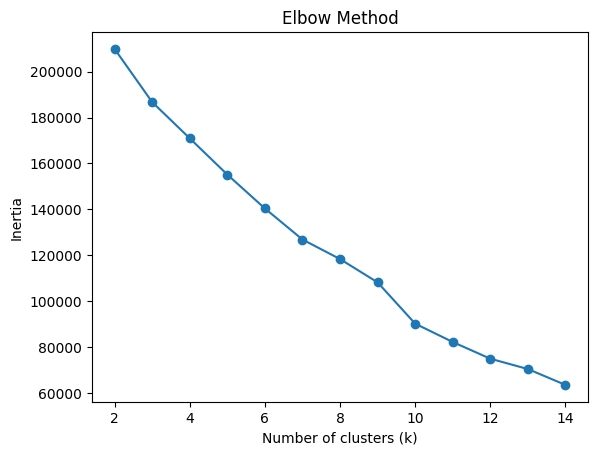

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


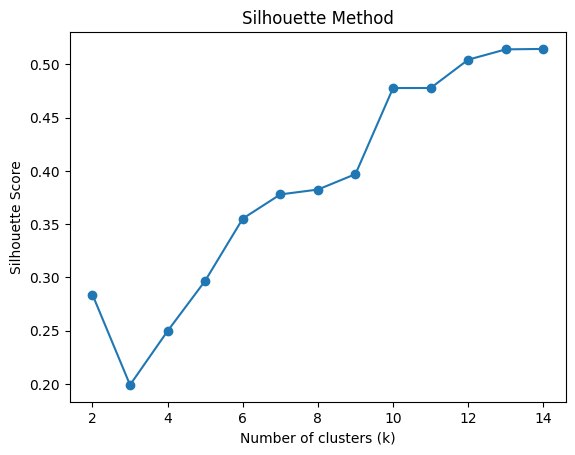

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    scores.append(score)

plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [ ]:
optimal_k=12
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(data_scaled)
labels = kmeans.labels_

score = silhouette_score(data_scaled, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.5043399719109504


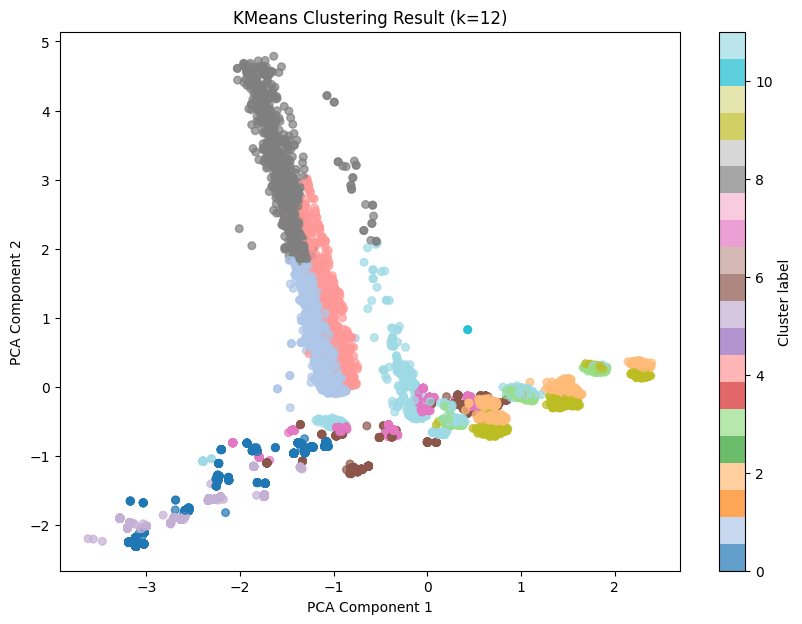

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(data_scaled)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab20', s=30, alpha=0.7)
plt.title(f'KMeans Clustering Result (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster label')
plt.show()


In [7]:
import pandas as pd
df = pd.read_csv("data.csv")
import numpy as np

# Add to DataFrame
df['cluster'] = labels
df.to_csv("data_with_clusters.csv", index=False)

In [8]:
df = pd.read_csv("data_with_clusters.csv")
df.head()

,ID,Job Title,Publishing Date,Start Date,Salary,Duration,Location,Work Mode,Skills,Description,...,Number of Candidates,Number of Employees,Sector,Description E,Experience,Contract Type,Education,scrap_date_parsed,estm_publishdate,cluster
0,0,développeur full stack java flutter confirmé ...,2025-02-26,asap,450,24 mois,lille,non spécifié,"java, flutter, kubernetes, tdd",nous sommes é la recherche dun développeur ful...,...,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,2025-02-26,2025-02-26,11
1,1,consultant devops sénior kubernetes grafana,2025-02-26,asap,500,12 mois,lille,non spécifié,"kubernetes, grafana, datadog",nou sommes é la recherche din consultant devop...,...,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,2025-02-26,2025-02-26,11
2,2,gestionnaire dapplication sénior servicenow j...,2025-02-26,asap,470,12 mois,lille,non spécifié,"servicenow, javascript",nous sommes é la recherche dun gestionnaire da...,...,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,2025-02-26,2025-02-26,11
3,3,data scientist confirmé servicenow bigquery,2025-02-26,asap,450,24 mois,lille,non spécifié,"servicenow, bigquery, data visualization",nous sommes é la recherche dun data scientist ...,...,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,2025-02-26,2025-02-26,11
4,4,développeur full stack java vuejs gcp sénior ...,2025-02-26,asap,450,24 mois,lille,non spécifié,"java, vue.js, gcp",nous sommes é la recherche dun développeur ful...,...,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,non spécifié,2025-02-26,2025-02-26,11
